In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import plotly.express as px
import pickle
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
df=pd.read_csv('/content/drive/MyDrive/ml_intern_task/TASK-ML-INTERN.csv')

In [5]:
df.sample(5)

,hsi_id,0,1,2,3,4,5,6,7,8,...,439,440,441,442,443,444,445,446,447,vomitoxin_ppb
130,imagoai_corn_130,0.449266,0.453512,0.435732,0.421824,0.427446,0.427553,0.413417,0.403988,0.411840,...,0.763071,0.759081,0.774057,0.773394,0.782588,0.765581,0.768060,0.779139,0.768823,800.0
125,imagoai_corn_125,0.440021,0.452171,0.454981,0.452239,0.432195,0.439755,0.410487,0.427338,0.414966,...,0.904869,0.920964,0.897574,0.912240,0.912488,0.910043,0.903381,0.896148,0.893679,400.0
100,imagoai_corn_100,0.472614,0.483179,0.473928,0.467689,0.459704,0.468497,0.444642,0.449286,0.439891,...,0.799524,0.777393,0.783000,0.797162,0.794427,0.796161,0.788685,0.805513,0.811167,0.0
366,imagoai_corn_366,0.497664,0.492989,0.475195,0.481839,0.470906,0.476260,0.449603,0.456123,0.439991,...,0.785338,0.789528,0.774909,0.780034,0.769270,0.777326,0.773449,0.779537,0.774888,280.0
115,imagoai_corn_115,0.449675,0.429914,0.389188,0.410758,0.394882,0.398457,0.392909,0.373961,0.378391,...,0.680845,0.695835,0.704496,0.698794,0.711924,0.683819,0.712129,0.690718,0.707941,6300.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Columns: 450 entries, hsi_id to vomitoxin_ppb
dtypes: float64(449), object(1)
memory usage: 1.7+ MB


In [7]:
df.isnull().sum()

,0
hsi_id,0
0,0
1,0
2,0
3,0
...,...
444,0
445,0
446,0
447,0


(array([361.,  36.,  22.,  23.,  14.,  11.,   8.,   2.,   1.,   1.,   2.,
          1.,   0.,   7.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          4.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          1.]),
 array([     0.,   1310.,   2620.,   3930.,   5240.,   6550.,   7860.,
          9170.,  10480.,  11790.,  13100.,  14410.,  15720.,  17030.,
         18340.,  19650.,  20960.,  22270.,  23580.,  24890.,  26200.,
         27510.,  28820.,  30130.,  31440.,  32750.,  34060.,  35370.,
         36680.,  37990.,  39300.,

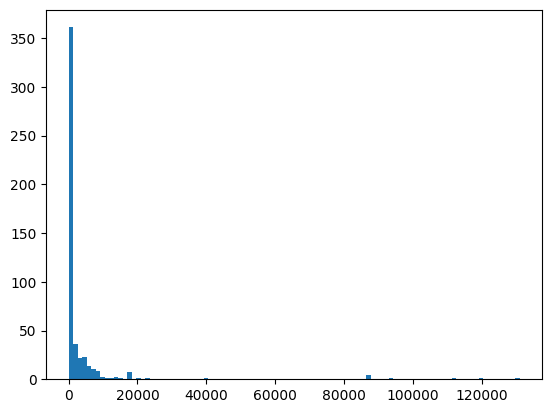

In [8]:
plt.hist(df['vomitoxin_ppb'],bins=100)

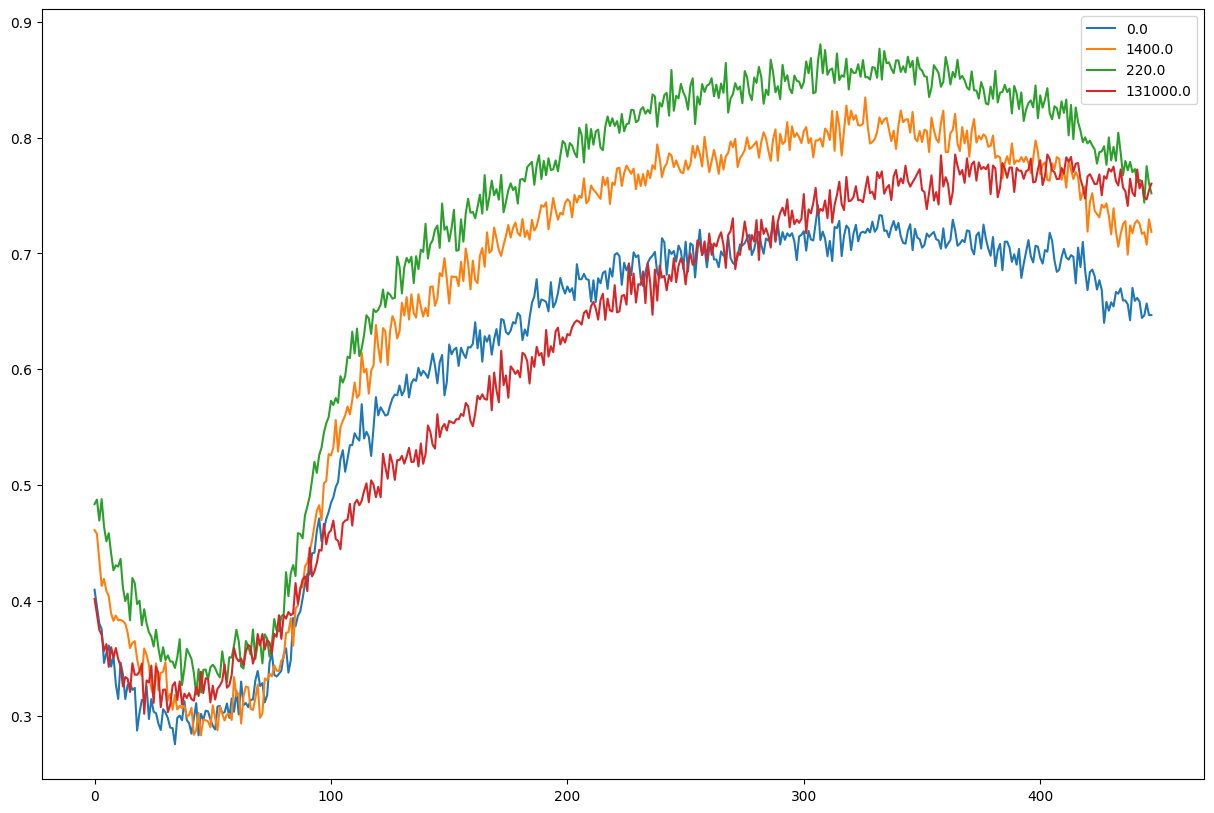

In [9]:
plt.figure(figsize=(15,10))
df.loc[496].drop(['vomitoxin_ppb','hsi_id']).plot(kind='line',label=df.loc[496]['vomitoxin_ppb'])
df.loc[499].drop(['vomitoxin_ppb','hsi_id']).plot(kind='line',label=df.loc[499]['vomitoxin_ppb'])
df.loc[4].drop(['vomitoxin_ppb','hsi_id']).plot(kind='line',label=df.loc[4]['vomitoxin_ppb'])
df.loc[117].drop(['vomitoxin_ppb','hsi_id']).plot(kind='line',label=df.loc[117]['vomitoxin_ppb'])
plt.legend()

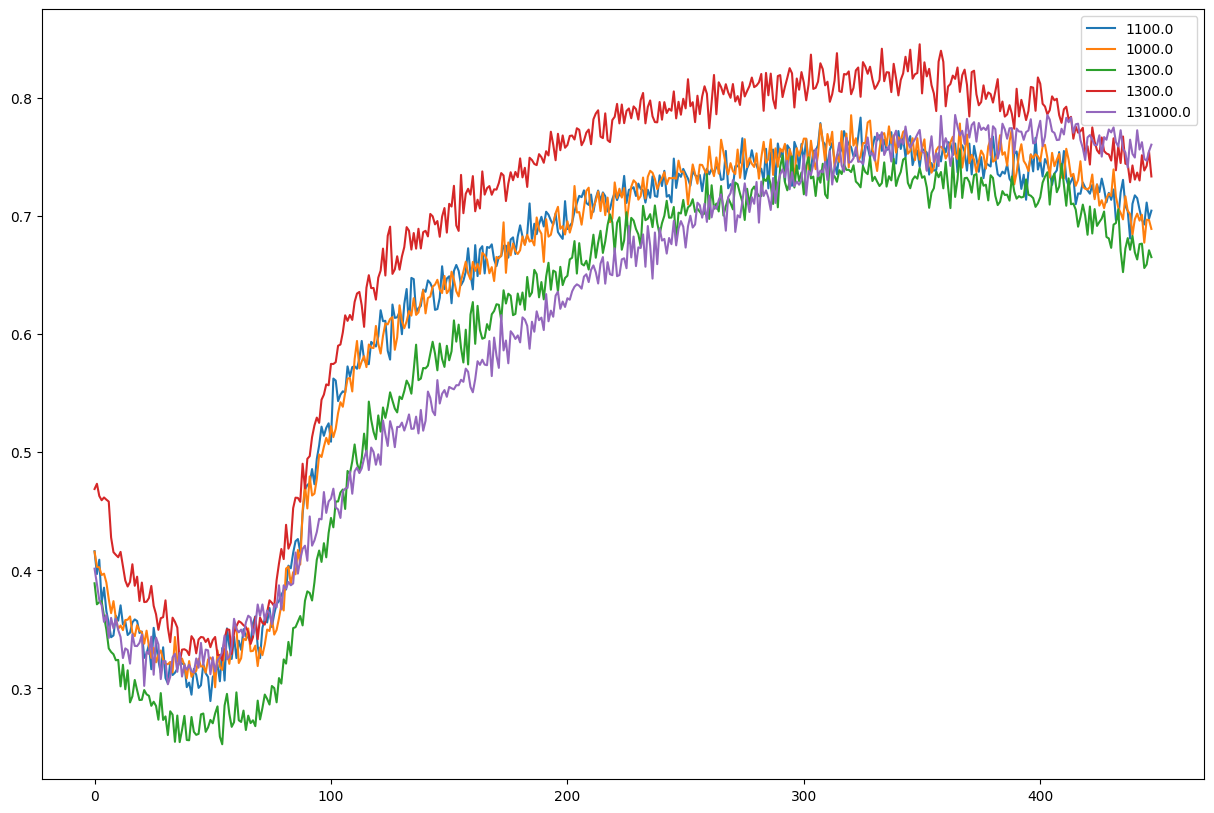

In [10]:
plt.figure(figsize=(15,10))
for i in range(0,4):
  df.loc[i].drop(['vomitoxin_ppb','hsi_id']).plot(kind='line',label=df.loc[i]['vomitoxin_ppb'])
df.loc[117].drop(['vomitoxin_ppb','hsi_id']).plot(kind='line',label=df.loc[117]['vomitoxin_ppb'])
plt.legend()
plt.show()

In [15]:
# Separate features (X) and target variable (y) if needed
X = df.drop(['vomitoxin_ppb', 'hsi_id'], axis=1)
y = df['vomitoxin_ppb']
# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce dimensions while explaining 95% of variance
pca = PCA(n_components=0.95) # or n_components = desired number of components
X_pca = pca.fit_transform(X_scaled)

# Print the number of principal components selected
print(f"Number of principal components selected: {pca.n_components_}")

# X_pca now contains the data with reduced dimensions

Number of principal components selected: 3


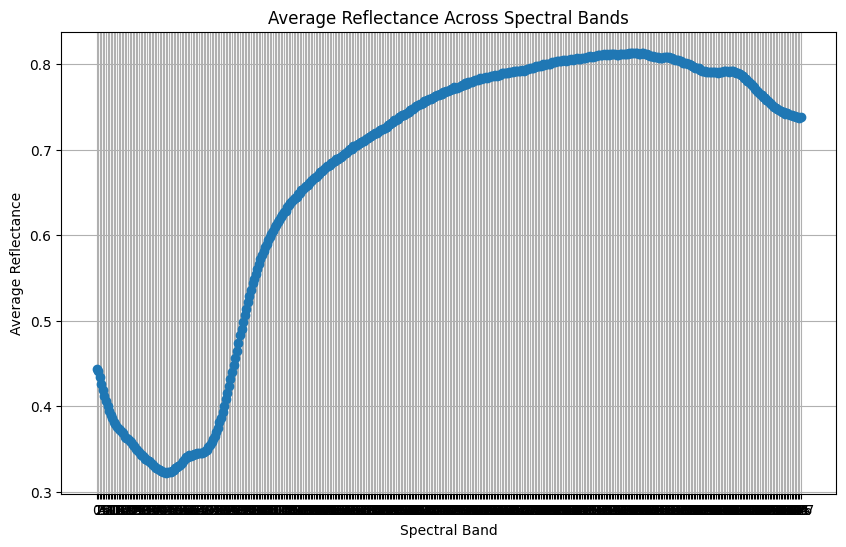

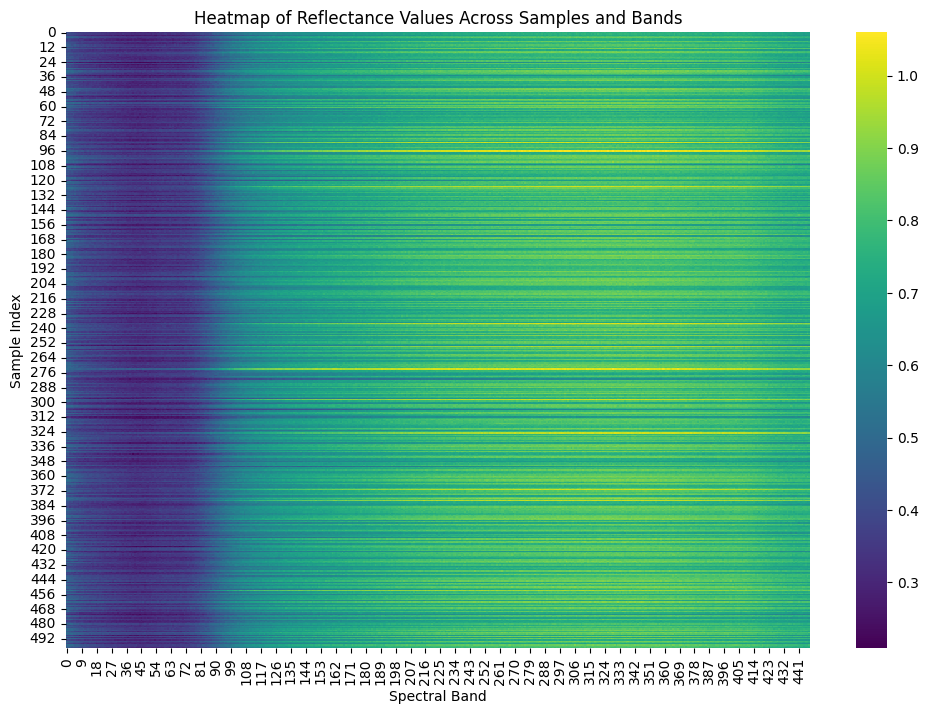

In [16]:
average_reflectance = X.mean(axis=0)
plt.figure(figsize=(10, 6))
plt.plot(average_reflectance.index, average_reflectance.values, marker='o', linestyle='-')
plt.xlabel('Spectral Band')
plt.ylabel('Average Reflectance')
plt.title('Average Reflectance Across Spectral Bands')
plt.grid(True)
plt.show()

# Heatmap for Sample Comparisons
plt.figure(figsize=(12, 8))
sns.heatmap(X, cmap='viridis', cbar=True)
plt.xlabel('Spectral Band')
plt.ylabel('Sample Index')
plt.title('Heatmap of Reflectance Values Across Samples and Bands')
plt.show()

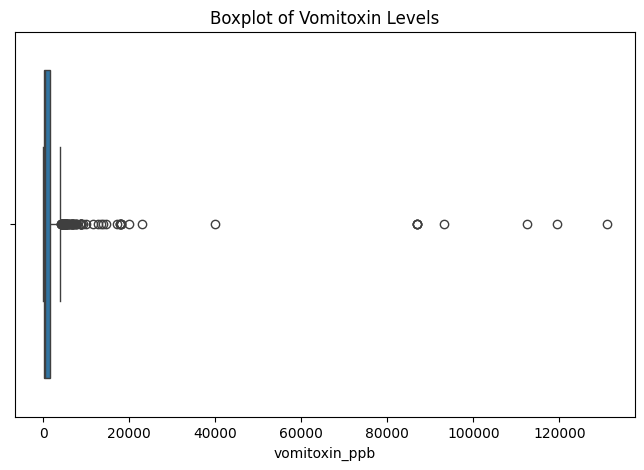

In [17]:
# Boxplot to detect outliers
plt.figure(figsize=(8, 5))
sns.boxplot(x=y)
plt.title("Boxplot of Vomitoxin Levels")
plt.show()

In [18]:
# Create the 3D scatter plot
fig = px.scatter_3d(
    x=X_pca[:, 0],  # First principal component
    y=X_pca[:, 1],  # Second principal component
    z=X_pca[:, 2],  # Third principal component
    color=y,  # Color points by vomitoxin_ppb
    labels={'x': 'PC1', 'y': 'PC2', 'z': 'PC3', 'color': 'Vomitoxin (ppb)'},  # Customize labels
    title='3D Scatter Plot of Reduced Features Colored by Vomitoxin'  # Add title
)

fig.show()


Mean Squared Error: 14088535.595755
R-squared: 0.9495997613858541
Mean Absolute Error: 1799.1235000000001


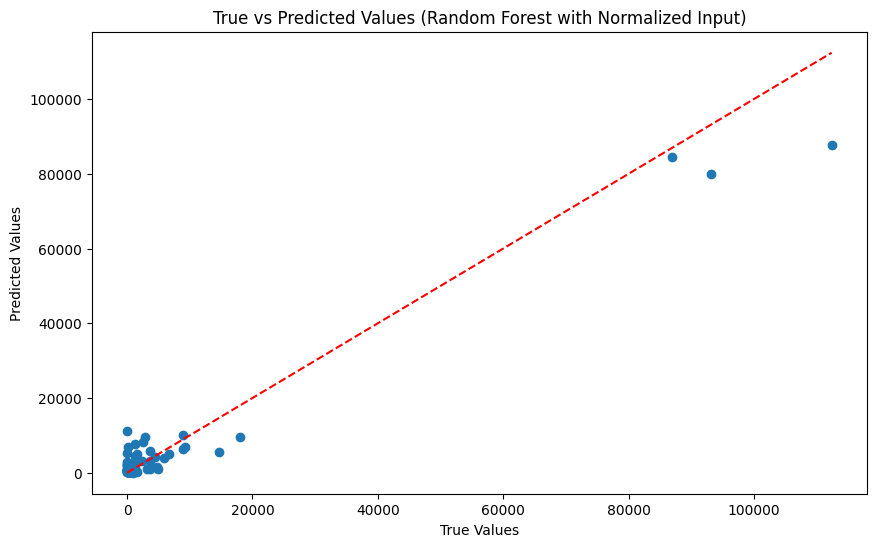

In [19]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X_pca)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)


# Initialize and train a Random Forest Regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")
print(f"Mean Absolute Error: {mae}")

# Plot y_pred and y_true
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predicted Values")
plt.title("True vs Predicted Values (Random Forest with Normalized Input)")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--') # Add diagonal line for reference
plt.show()


In [20]:
# Save the trained model, PCA, and scaler
with open('model_pipeline.pkl', 'wb') as file:
    pickle.dump({'model': regressor, 'pca': pca, 'scaler': scaler}, file)

print("Model, PCA, and Scaler saved successfully!")


Model, PCA, and Scaler saved successfully!
